# Sports Analysis Project

The project involves utilizing data analytics techniques to explore and understand the characteristics and performance metrics of strikers. By employing descriptive statistics, data visualization, feature engineering, and machine learning algorithms, I aim to identify the key attributes that contribute to a striker's success on the field and classify them into different categories based on their performance.

### Purpose

The primary purpose of this project is to provide a systematic framework for analysing and categorizing strikers based on their performance metrics and personal attributes. By doing so, coaches, scouts, and football analysts can gain valuable insights into the characteristics of top-performing strikers and make informed decisions in team selection, recruitment, and strategic planning.

#### 1. Data Cleaning

**Importing the essential libraries and loading the dataset.**

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

df = pd.read_excel('Strikers_performance.xlsx')

Find the number of missing values in each column

In [6]:
missing_data = df.isnull().sum()
print('Missing Data:')
missing_data

Missing Data:


Striker_ID                    0
Nationality                   0
Footedness                    0
Marital Status                0
Goals Scored                  0
Assists                       0
Shots on Target               0
Shot Accuracy                 0
Conversion Rate               0
Dribbling Success             0
Movement of the Ball          6
Hold-up Play                  0
Aerial Duels Won              0
Defensive Contribution        0
Big Game Performance          2
Consistency                   0
Penalty Success Rate          5
Impact on Team Performance    0
Off-field Conduct             0
dtype: int64

Imputing the data to correct any missing values and checking there are no missing values left

In [7]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')
df[['Movement of the Ball','Big Game Performance', 'Penalty Success Rate']] = imputer.fit_transform(df[['Movement of the Ball', 'Big Game Performance', 'Penalty Success Rate']])


In [8]:
missing_data = df.isnull().sum()
print('Missing Data:')
missing_data

Missing Data:


Striker_ID                    0
Nationality                   0
Footedness                    0
Marital Status                0
Goals Scored                  0
Assists                       0
Shots on Target               0
Shot Accuracy                 0
Conversion Rate               0
Dribbling Success             0
Movement of the Ball          0
Hold-up Play                  0
Aerial Duels Won              0
Defensive Contribution        0
Big Game Performance          0
Consistency                   0
Penalty Success Rate          0
Impact on Team Performance    0
Off-field Conduct             0
dtype: int64

Checking the datatypes for each column

In [9]:
df.dtypes

Striker_ID                      int64
Nationality                    object
Footedness                     object
Marital Status                 object
Goals Scored                  float64
Assists                       float64
Shots on Target               float64
Shot Accuracy                 float64
Conversion Rate               float64
Dribbling Success             float64
Movement of the Ball          float64
Hold-up Play                  float64
Aerial Duels Won              float64
Defensive Contribution        float64
Big Game Performance          float64
Consistency                   float64
Penalty Success Rate          float64
Impact on Team Performance    float64
Off-field Conduct             float64
dtype: object

Correcting datatypes of incorrect 'float64' type columns to 'integers'

In [10]:
df[['Goals Scored', 'Assists', 'Shots on Target', 'Movement of the Ball', 'Hold-up Play', 'Aerial Duels Won', 
    'Defensive Contribution', 'Big Game Performance', 'Impact on Team Performance', 'Off-field Conduct']] =  df[['Goals Scored', 'Assists', 
    'Shots on Target', 'Movement of the Ball', 'Hold-up Play', 'Aerial Duels Won', 'Defensive Contribution', 'Big Game Performance', 
    'Impact on Team Performance', 'Off-field Conduct']].astype(int)
df.dtypes

Striker_ID                      int64
Nationality                    object
Footedness                     object
Marital Status                 object
Goals Scored                    int64
Assists                         int64
Shots on Target                 int64
Shot Accuracy                 float64
Conversion Rate               float64
Dribbling Success             float64
Movement of the Ball            int64
Hold-up Play                    int64
Aerial Duels Won                int64
Defensive Contribution          int64
Big Game Performance            int64
Consistency                   float64
Penalty Success Rate          float64
Impact on Team Performance      int64
Off-field Conduct               int64
dtype: object

#### 2. Descriptive Analysis

In [11]:
df['Nationality'].value_counts()

Nationality
Spain      112
England    109
Brazil      95
France      93
Germany     91
Name: count, dtype: int64

In [12]:
freq_footedness = df['Footedness'].value_counts()
freq_footedness

Footedness
Right-footed    267
Left-footed     233
Name: count, dtype: int64

In [13]:
df['Marital Status'].value_counts()

Marital Status
Yes    258
No     242
Name: count, dtype: int64

In [14]:
round(df.describe(), 2)

,Striker_ID,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement of the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct
count,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00
mean,250.50,14.52,7.60,25.26,0.60,0.20,0.70,69.28,59.33,19.04,39.47,6.43,0.74,0.80,6.52,7.57
std,144.48,4.91,2.96,7.08,0.10,0.05,0.10,10.33,10.15,4.95,9.90,1.98,0.10,0.10,2.11,2.09
min,1.00,0.00,0.00,4.00,0.31,0.05,0.40,40.00,35.00,4.00,8.00,2.00,0.46,0.53,0.00,0.00
25%,125.75,11.00,6.00,20.00,0.54,0.17,0.64,62.00,52.00,16.00,33.00,5.00,0.68,0.72,5.00,6.00
50%,250.50,15.00,8.00,25.00,0.60,0.20,0.70,69.00,60.00,19.00,39.50,6.00,0.75,0.80,6.50,8.00
75%,375.25,18.00,9.00,30.00,0.67,0.23,0.76,76.00,66.00,22.00,46.00,8.00,0.81,0.87,8.00,9.00
max,500.00,34.00,15.00,43.00,0.92,0.36,1.00,98.00,92.00,34.00,71.00,12.00,1.00,1.00,13.00,13.00


In [15]:
goals_scored_by_nationality = df.groupby('Nationality')['Goals Scored'].mean()
goals_scored_by_nationality

Nationality
Brazil     15.315789
England    13.899083
France     14.408602
Germany    14.351648
Spain      14.687500
Name: Goals Scored, dtype: float64

In [16]:
pivot_table = df.pivot_table(index = 'Footedness',
                               values = ['Conversion Rate', 'Shot Accuracy', 'Penalty Success Rate'],
                               aggfunc = {'Footedness':'count','Conversion Rate':'mean', 'Shot Accuracy':'mean','Penalty Success Rate':'mean'})

pivot_table = pivot_table.rename(columns = {'Footedness':'Footedness count',
                                            'Conversion Rate':'Mean CR',
                                            'Penalty Success Rate':'Mean PSR',
                                            'Shot Accuracy':'Mean SA'})
pivot_table


,Mean CR,Footedness count,Mean PSR,Mean SA
Footedness,,,,
Left-footed,0.198086,233,0.791026,0.600929
Right-footed,0.200592,267,0.799458,0.605404


In [17]:
cross_tab = pd.crosstab(df['Footedness'], df['Nationality'])
cross_tab

Nationality,Brazil,England,France,Germany,Spain
Footedness,,,,,
Left-footed,42,50,42,44,55
Right-footed,53,59,51,47,57


In [18]:
num_variables = df.select_dtypes(include =['number']).columns
num_variables

Index(['Striker_ID', 'Goals Scored', 'Assists', 'Shots on Target',
       'Shot Accuracy', 'Conversion Rate', 'Dribbling Success',
       'Movement of the Ball', 'Hold-up Play', 'Aerial Duels Won',
       'Defensive Contribution', 'Big Game Performance', 'Consistency',
       'Penalty Success Rate', 'Impact on Team Performance',
       'Off-field Conduct'],
      dtype='object')

In [19]:
correl = round(df[num_variables].corr(),3)
correl

,Striker_ID,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement of the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct
Striker_ID,1.000,0.025,0.066,0.003,0.018,0.047,-0.031,0.060,-0.036,0.016,0.012,-0.052,-0.017,-0.006,-0.027,0.103
Goals Scored,0.025,1.000,-0.071,-0.059,0.066,-0.011,0.034,0.016,0.003,-0.047,0.014,-0.004,0.045,-0.021,0.103,-0.053
Assists,0.066,-0.071,1.000,0.072,-0.020,0.028,0.050,0.011,-0.046,0.001,-0.011,0.026,-0.007,-0.081,-0.022,-0.015
Shots on Target,0.003,-0.059,0.072,1.000,-0.021,-0.044,0.010,-0.062,-0.102,-0.068,0.011,0.039,0.049,0.029,0.025,0.055
Shot Accuracy,0.018,0.066,-0.020,-0.021,1.000,-0.088,0.023,-0.018,-0.044,0.012,0.027,-0.019,0.005,0.017,0.041,0.084
Conversion Rate,0.047,-0.011,0.028,-0.044,-0.088,1.000,-0.020,0.038,0.059,0.059,-0.002,0.037,0.031,-0.049,-0.031,-0.004
Dribbling Success,-0.031,0.034,0.050,0.010,0.023,-0.020,1.000,-0.056,0.002,-0.072,0.015,-0.059,-0.030,-0.054,-0.012,-0.060
Movement of the Ball,0.060,0.016,0.011,-0.062,-0.018,0.038,-0.056,1.000,-0.057,0.013,-0.006,-0.075,-0.030,-0.071,-0.046,-0.035
Hold-up Play,-0.036,0.003,-0.046,-0.102,-0.044,0.059,0.002,-0.057,1.000,0.080,0.029,-0.031,0.147,0.068,-0.046,0.035
Aerial Duels Won,0.016,-0.047,0.001,-0.068,0.012,0.059,-0.072,0.013,0.080,1.000,-0.025,-0.013,0.047,-0.002,0.043,0.004


#### 3. Data Visualisation

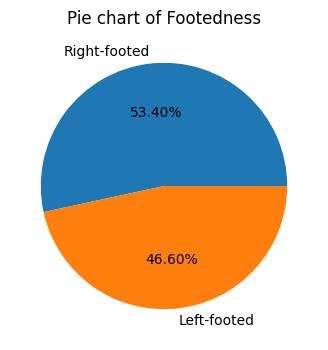

In [20]:
perc_footedness = freq_footedness/len(df['Footedness'])*100

plt.figure(figsize=(4,4))
perc_footedness.plot(kind='pie',autopct='%1.2f%%')
plt.title('Pie chart of Footedness')
plt.ylabel('')
plt.show()

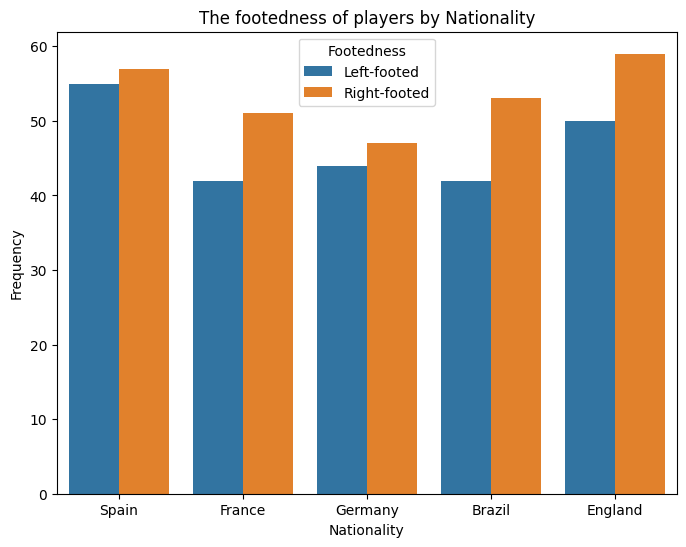

In [21]:
plt.figure(figsize=(8,6))
sns.countplot(x='Nationality', hue='Footedness', data=df)
plt.title('The footedness of players by Nationality')
plt.xlabel('Nationality')
plt.ylabel('Frequency')
plt.show()

#### 4. Statistical Analysis

In [22]:
from scipy.stats import shapiro

In [23]:
shapiro_results = {}

for column in num_variables:
    stat, p_value = shapiro(df[column])
    shapiro_results[column] = round(p_value,3)

shapiro_results

{'Striker_ID': np.float64(0.0),
 'Goals Scored': np.float64(0.023),
 'Assists': np.float64(0.0),
 'Shots on Target': np.float64(0.203),
 'Shot Accuracy': np.float64(0.576),
 'Conversion Rate': np.float64(0.994),
 'Dribbling Success': np.float64(0.778),
 'Movement of the Ball': np.float64(0.314),
 'Hold-up Play': np.float64(0.151),
 'Aerial Duels Won': np.float64(0.018),
 'Defensive Contribution': np.float64(0.042),
 'Big Game Performance': np.float64(0.0),
 'Consistency': np.float64(0.451),
 'Penalty Success Rate': np.float64(0.003),
 'Impact on Team Performance': np.float64(0.0),
 'Off-field Conduct': np.float64(0.0)}

Finding whether there is any significant difference in consistency raters among strikers from various nationalities

In [24]:
from scipy import stats

Brazil = df.query('Nationality == "Brazil"')['Consistency']
England = df.query('Nationality == "England"')['Consistency']
France = df.query('Nationality == "France"')['Consistency']
Germany = df.query('Nationality == "Germany"')['Consistency']
Spain = df.query('Nationality == "Spain"')['Consistency']

t_stat, p_value = stats.f_oneway(Brazil, England, France, Germany, Spain)
print('P-value:', p_value)

if p_value < 0.05:
    print('Reject the null hypothesis')
else:
    print('Accept the null hypothesis')

P-value: 0.1927867590159922
Accept the null hypothesis


Checking if there is significant correlation between strikers' hold-up play and consistency rate.

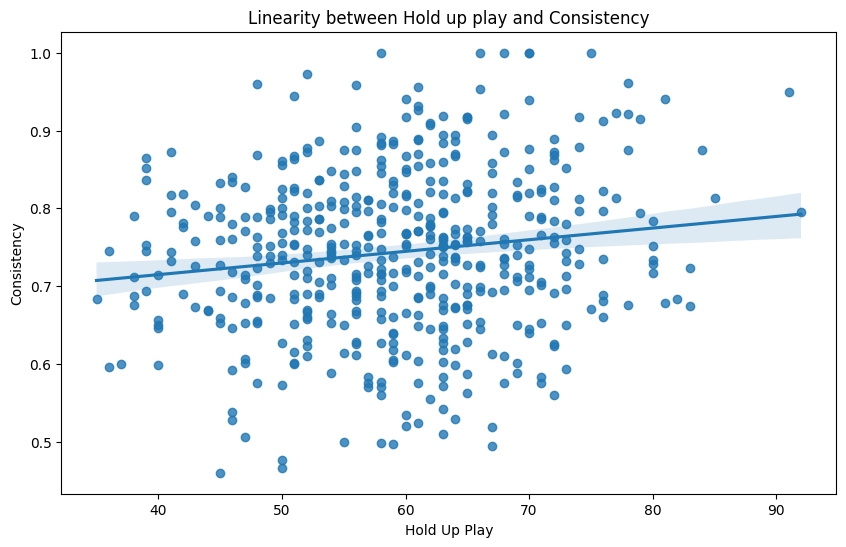

In [25]:
plt.figure(figsize=(10,6))
sns.regplot(x='Hold-up Play', y='Consistency', data=df)
plt.title('Linearity between Hold up play and Consistency')
plt.xlabel('Hold Up Play')
plt.ylabel('Consistency')
plt.show()

In [26]:
from scipy.stats import pearsonr

hold_up_play = df['Hold-up Play']
consistency = df['Consistency']

corr, p_value = pearsonr(hold_up_play, consistency)

print('Correlation coefficient:', round(corr,3))
print('P-value:', p_value)

if p_value < 0.05:
    print('Reject the null hypothesis')
else:
    print('Accept the null hypothesis')

Correlation coefficient: 0.147
P-value: 0.001014696305363074
Reject the null hypothesis


Does striker's hold-up play significantly influence their consistency rate?

In [27]:
import statsmodels.api as sm

x = df['Hold-up Play']
y = df['Consistency']

x_and_constant = sm.add_constant(x)
model = sm.OLS(y,x_and_constant).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Consistency   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     10.93
Date:                Thu, 06 Mar 2025   Prob (F-statistic):            0.00101
Time:                        11:06:44   Log-Likelihood:                 429.97
No. Observations:                 500   AIC:                            -855.9
Df Residuals:                     498   BIC:                            -847.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.6548      0.027     24.031   

Very weak positive influence. Reject the null hypothesis as the p-value is less than 0.05

#### 5. Feature Engineering

Create a new feature called 'Total Contribution'

In [35]:
df['Total Contribution'] = df['Goals Scored']+df['Assists']+df['Shots on Target']+df['Dribbling Success']+df['Aerial Duels Won']+df['Defensive Contribution']+df['Big Game Performance']+df['Consistency']

df.head()

,Striker_ID,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement of the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Total Contribution
0,1,Spain,Left-footed,No,17,10,34,0.677836,0.166241,0.757061,50,71,15,30,6,0.820314,0.922727,8,11,113.577376
1,2,France,Left-footed,Yes,14,13,31,0.544881,0.192774,0.796818,61,53,19,26,6,0.803321,0.678984,3,8,110.600139
2,3,Germany,Left-footed,No,18,3,25,0.518180,0.160379,0.666869,65,60,20,24,3,0.766540,0.843858,8,9,94.433410
3,4,France,Right-footed,No,22,9,20,0.599663,0.184602,0.638776,88,60,22,44,6,0.611798,0.662997,6,8,124.250575
4,5,France,Left-footed,Yes,13,6,29,0.582982,0.105319,0.591485,75,54,13,37,8,0.701638,0.906538,8,6,107.293123


Encoding Marital Status and Footedness

In [37]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['encoded_marital_status'] = encoder.fit_transform(df['Marital Status'])
df['encoded_footedness'] = encoder.fit_transform(df['Footedness'])

df.head()


,Striker_ID,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,...,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Total Contribution,encoded_marital_status,encoded_footedness
0,1,Spain,Left-footed,No,17,10,34,0.677836,0.166241,0.757061,...,15,30,6,0.820314,0.922727,8,11,113.577376,0,0
1,2,France,Left-footed,Yes,14,13,31,0.544881,0.192774,0.796818,...,19,26,6,0.803321,0.678984,3,8,110.600139,1,0
2,3,Germany,Left-footed,No,18,3,25,0.518180,0.160379,0.666869,...,20,24,3,0.766540,0.843858,8,9,94.433410,0,0
3,4,France,Right-footed,No,22,9,20,0.599663,0.184602,0.638776,...,22,44,6,0.611798,0.662997,6,8,124.250575,0,1
4,5,France,Left-footed,Yes,13,6,29,0.582982,0.105319,0.591485,...,13,37,8,0.701638,0.906538,8,6,107.293123,1,0


Create dummy variables for Nationality and add them to the data

In [44]:
dummy = pd.get_dummies(df[['Nationality']], dtype=int)
df = pd.concat([df, dummy], axis = 1)

df.head()

,Striker_ID,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,...,Impact on Team Performance,Off-field Conduct,Total Contribution,encoded_marital_status,encoded_footedness,Nationality_Brazil,Nationality_England,Nationality_France,Nationality_Germany,Nationality_Spain
0,1,Spain,Left-footed,No,17,10,34,0.677836,0.166241,0.757061,...,8,11,113.577376,0,0,0,0,0,0,1
1,2,France,Left-footed,Yes,14,13,31,0.544881,0.192774,0.796818,...,3,8,110.600139,1,0,0,0,1,0,0
2,3,Germany,Left-footed,No,18,3,25,0.518180,0.160379,0.666869,...,8,9,94.433410,0,0,0,0,0,1,0
3,4,France,Right-footed,No,22,9,20,0.599663,0.184602,0.638776,...,6,8,124.250575,0,1,0,0,1,0,0
4,5,France,Left-footed,Yes,13,6,29,0.582982,0.105319,0.591485,...,8,6,107.293123,1,0,0,0,1,0,0
